# Non-invasive Phenotyping for Water and Nitrogen Uptake by Deep Roots Explored using Machine Learning


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# RadiMax Wheat 2018 and 2019

# Reading RLD data and isotope data of 2018 and 2019 experiments

In [2]:
import numpy as np
import pandas as pd

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/CLEAN_Wheat3_Full_experiment_root_length.csv")
data_June18_raw = pd.read_csv("./Data/CLEAN_Wheat4_Full_experiment_root_length.csv")
data_July18_raw = pd.read_csv("./Data/CLEAN_Wheat5_Full_experiment_root_length.csv")
isotope_data_18 = pd.read_excel("./Data/isotope_dataframe.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Breeders_15N.xlsx")

# Importing RadiMax modules for RLD data pre-processing
# Pre-Processing 2018 and 2019 RLD data

In [3]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),Square_root=True,imageArea=20,)


# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=True,imageArea=20,)

In [4]:
n = 10  # Number of intervals for computation of RL 2018
Soil_depth_range_18 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May18["soil_depth"].min(),
                data_June18["soil_depth"].min(),
                data_July18["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May18["soil_depth"].max(),
                data_June18["soil_depth"].max(),
                data_July18["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_18 = Soil_depth_range_18.astype(int)

In [5]:
Soil_depth_range_18

array([119, 129, 140, 150, 160, 170, 180, 190, 200, 210, 220])

In [6]:
n = 10  # Number of intervals for computation of RL 2019
Soil_depth_range_19 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May19["soil_depth"].min(),
                data_June19["soil_depth"].min(),
                data_July19["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May19["soil_depth"].max(),
                data_June19["soil_depth"].max(),
                data_July19["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_19 = Soil_depth_range_19.astype(int)

# Computation Root Lengths at Different Soil Layers in  2018

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Computation Root Lengths at Different Soil Layers in  2018
RL_May18, _ = fun_RL_computation(
    data_May18.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June18, _ = fun_RL_computation(
    data_June18.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July18, Intervals = fun_RL_computation(
    data_July18.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

In [8]:
RL_May18

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",row
0,0.195187,0.107960,0.053347,0.018372,0.016322,0.021631,0.045999,0.040637,0.026773,0.011585,1.0
1,0.151156,0.209602,0.087589,0.000000,0.002834,0.004656,0.021012,0.005113,0.026773,0.011585,2.0
2,0.104336,0.193423,0.146336,0.020219,0.026295,0.000000,0.006025,0.000000,0.026773,0.011585,3.0
3,0.219353,0.162597,0.110046,0.000000,0.003213,0.000000,0.000000,0.010872,0.026773,0.011585,4.0
4,0.152714,0.276721,0.296605,0.124326,0.012071,0.001205,0.000000,0.016525,0.026773,0.011585,5.0
...,...,...,...,...,...,...,...,...,...,...,...
291,0.283479,0.245711,0.166316,0.106703,0.235070,0.085732,0.020270,0.026996,0.031514,0.002834,294.0
292,0.239468,0.191084,0.150151,0.108678,0.078113,0.044570,0.028357,0.017290,0.026773,0.011585,295.0
293,0.294252,0.194574,0.227254,0.115076,0.112663,0.104932,0.000000,0.000000,0.000000,0.006892,296.0
294,0.457254,0.273793,0.223097,0.059403,0.072878,0.103342,0.011044,0.024620,0.032148,0.007849,297.0


# Figure 3: Average square root of planar root length density (Sqrt_pRLD) across all facility lines accumulated for 10 depth intervals between 119 and 220 cm in 2018 and 2019. The colors represent the three different imaging time-points. Error bars representing the standard deviation

In [9]:
import pandas as pd
import numpy as np
from numpy import std
import matplotlib.pyplot as plt

# 2018 

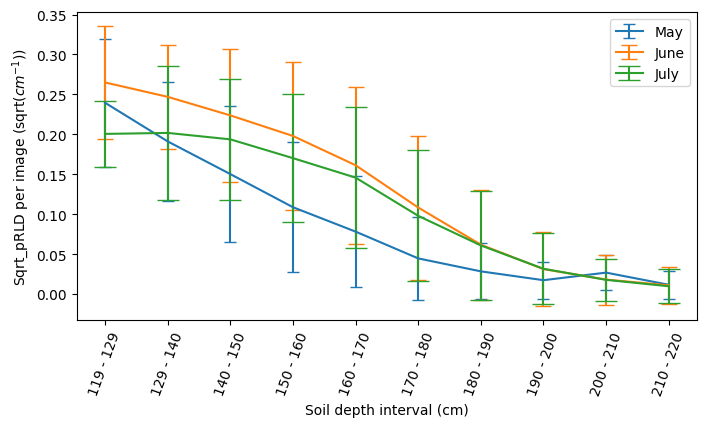

In [10]:
plot_RL(RL_May18, RL_June18, RL_July18, Intervals, n)  # Transformed data: Square root= True


In [11]:
# Computation Root Lengths in Different Soil Layers in 2019

RL_May19, _ = fun_RL_computation(
    data_May19.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June19, _ = fun_RL_computation(
    data_June19.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July19, Intervals = fun_RL_computation(
    data_July19.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

# 2019

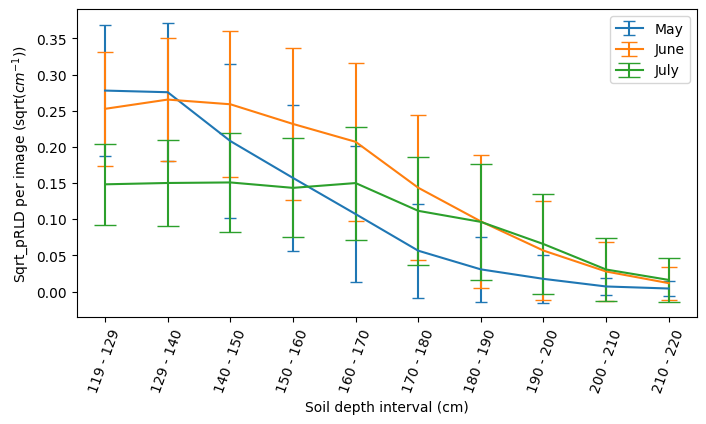

In [12]:
plot_RL(RL_May19, RL_June19, RL_July19, Intervals, n)  #  #  Transformed data: Square root= True

In [13]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_18 = RL_May18.merge(RL_June18, on="row").merge(RL_July18, on="row")

In [14]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_19 = RL_May19.merge(RL_June19, on="row").merge(RL_July19, on="row")

In [15]:
isotope_data_tube18 = isotope_data_preprocess(isotope_data_18.copy(), 2018)

In [16]:
isotope_data_tube19 = isotope_data_preprocess(isotope_data_19.copy(), 2019, side="Both")

In [17]:
# Merging the RLD with isotope data on tube side of Bed 1 and Bed 2
RL_Isotope_Interval_18 = pd.merge(RL_Interval_18, isotope_data_tube18, on="row")
RL_Isotope_Interval_18.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_18.dropna(inplace=True)
RL_Isotope_Interval_18.to_csv("./RL_Interval_data/df_18_Square_root.csv")

In [18]:
RL_Isotope_Interval_18

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",x,bed,Delta_15N,Delta_13C,Log_Delta_15N
0,0.195187,0.107960,0.053347,0.018372,0.016322,0.021631,0.045999,0.040637,0.026773,0.011585,...,0.047005,0.041423,0.033355,0.019554,0.045019,1101,1,1.713046,-24.518905,0.538273
1,0.151156,0.209602,0.087589,0.000000,0.002834,0.004656,0.021012,0.005113,0.026773,0.011585,...,0.000000,0.019992,0.013177,0.000000,0.005678,1102,1,1.215484,-24.813728,0.195143
2,0.104336,0.193423,0.146336,0.020219,0.026295,0.000000,0.006025,0.000000,0.026773,0.011585,...,0.000000,0.021168,0.017020,0.000000,0.012919,1103,1,2.525698,-24.378695,0.926517
3,0.219353,0.162597,0.110046,0.000000,0.003213,0.000000,0.000000,0.010872,0.026773,0.011585,...,0.007688,0.008818,0.008349,0.000000,0.017106,1104,1,2.222993,-25.357771,0.798855
4,0.152714,0.276721,0.296605,0.124326,0.012071,0.001205,0.000000,0.016525,0.026773,0.011585,...,0.032095,0.000000,0.000000,0.027976,0.000000,1105,1,5.704717,-25.992775,1.741293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.283479,0.245711,0.166316,0.106703,0.235070,0.085732,0.020270,0.026996,0.031514,0.002834,...,0.200327,0.111799,0.041020,0.026733,0.024477,2244,2,208.269947,-28.017986,5.338835
280,0.239468,0.191084,0.150151,0.108678,0.078113,0.044570,0.028357,0.017290,0.026773,0.011585,...,0.177273,0.122906,0.000000,0.021265,0.020981,2245,2,257.276033,-27.378227,5.550150
281,0.294252,0.194574,0.227254,0.115076,0.112663,0.104932,0.000000,0.000000,0.000000,0.006892,...,0.109460,0.055394,0.011357,0.011807,0.000000,2246,2,35.373231,-27.424476,3.565955
282,0.457254,0.273793,0.223097,0.059403,0.072878,0.103342,0.011044,0.024620,0.032148,0.007849,...,0.125906,0.000000,0.019133,0.029092,0.004355,2247,2,202.782910,-27.104056,5.312136


In [19]:
RL_Isotope_Interval_19 = pd.merge(RL_Interval_19, isotope_data_tube19, on="row")
RL_Isotope_Interval_19.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_19.dropna(inplace=True)
RL_Isotope_Interval_19.to_csv("./RL_Interval_data/df_19_Square_root.csv")

In [20]:
RL_Isotope_Interval_19

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",x,bed,Delta_15N,Delta_13C,Log_Delta_15N
0,0.139623,0.235355,0.218593,0.000000,0.152647,0.076792,0.017146,0.000000,0.000000,0.011267,...,0.179483,0.071737,0.038532,0.000000,0.000000,1132,1,9.723354,-27.751447,2.274531
1,0.192759,0.214845,0.000000,0.207680,0.111032,0.000000,0.042426,0.000000,0.000000,0.000000,...,0.174480,0.029769,0.004568,0.008818,0.000000,1133,1,2.231121,-27.230851,0.802504
2,0.332994,0.190140,0.167726,0.115017,0.065886,0.094328,0.001948,0.000000,0.011188,0.000000,...,0.058541,0.057339,0.027647,0.000000,0.000000,1134,1,7.455010,-28.088868,2.008886
3,0.330819,0.313140,0.245862,0.176720,0.025491,0.000000,0.000000,0.000000,0.004966,0.000000,...,0.130652,0.022880,0.000000,0.000000,0.000000,1135,1,3.322832,-28.171810,1.200818
4,0.280841,0.234559,0.205859,0.137935,0.044791,0.000000,0.045326,0.006159,0.000000,0.006262,...,0.030916,0.024491,0.034635,0.002754,0.005779,1136,1,2.519944,-27.718919,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.357727,0.413153,0.188224,0.001205,0.015581,0.000000,0.032639,0.000000,0.000000,0.000000,...,0.022504,0.023793,0.022419,0.000000,0.000000,2215,2,29.287565,-28.662173,3.377163
207,0.313989,0.304131,0.317017,0.056107,0.117036,0.000000,0.000000,0.000000,0.002385,0.003080,...,0.008263,0.000000,0.000000,0.014112,0.007027,2216,2,18.457427,-28.229561,2.915467
208,0.532392,0.409815,0.299245,0.324594,0.216917,0.073034,0.043501,0.006886,0.000000,0.000000,...,0.196545,0.178325,0.156810,0.117276,0.035417,2217,2,63.746254,-28.283105,4.154910
209,0.336415,0.307815,0.310424,0.185266,0.063399,0.001948,0.000000,0.000000,0.003373,0.000000,...,0.028105,0.049592,0.007022,0.000000,0.038533,2218,2,23.919325,-29.106020,3.174687


# For Figure 2 : Square root of pPlanar root length density (Sqrt_pRLD) in a single tube across soil depth in June 2018. The blue dots represent Sqrt_pRLD at every 3.5 cm soil depth. The distribution was modelled using an exponential decay model with D50 at 138 cm ( std: 0.3 cm) and a sigmoid function with inflection point at 150 cm ( std: 0.2 cm)

In [25]:
import numpy as np
import pandas as pd

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/CLEAN_Wheat3_Full_experiment_root_length.csv")
data_June18_raw = pd.read_csv("./Data/CLEAN_Wheat4_Full_experiment_root_length.csv")
data_July18_raw = pd.read_csv("./Data/CLEAN_Wheat5_Full_experiment_root_length.csv")
isotope_data_18 = pd.read_excel("./Data/isotope_dataframe.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Breeders_15N.xlsx")
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),Square_root=False,imageArea=20,)


# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=False,imageArea=20,)

In [26]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),Square_root=False,imageArea=20,)


# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=False,imageArea=20,)

In [27]:
#Droping missing Values [np.nan, np.inf, -np.inf]
import warnings
warnings.filterwarnings("ignore")

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data_May18_RL=data_May18.loc[:,['tube','Root_length','soil_depth']]
data_June18_RL=data_June18.loc[:,['tube','Root_length','soil_depth']]
data_July18_RL=data_July18.loc[:,['tube','Root_length','soil_depth']]
data_May18_RL=clean_dataset(data_May18_RL)
data_June18_RL=clean_dataset(data_June18_RL)
data_July18_RL=clean_dataset(data_July18_RL)

Tube No: 2


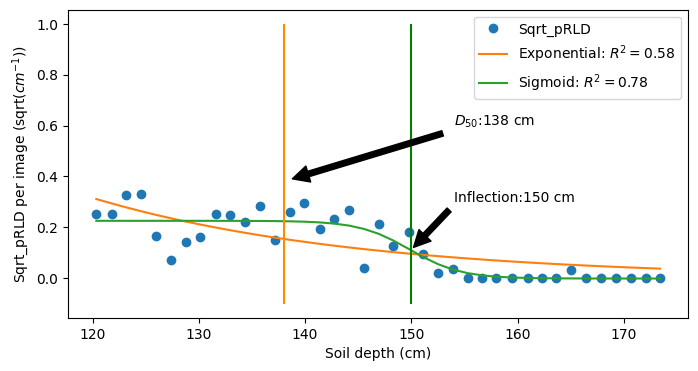

In [35]:
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

from RadiMaxRootDepth import func_exp,sigmoid,sigmoid_initial_Infle_point,count_consecutive

# Specify month for display results of curve fitting 
data=data_June18_RL.copy()
data.tube=data.tube.astype(int)
for i in [2]:    
    temp1 = data[data.tube==i].sort_values(by='soil_depth')
    x=temp1['soil_depth']
    y=temp1['Root_length']
    #y=y/20
    y=np.sqrt(y)
    indx,count=count_consecutive(y, 'zero')
    if count>=6:
        y=np.array(y[0:indx+6].values)
        x=np.array(x[0:indx+6].values)
        temp1=pd.DataFrame([])
        temp1['soil_depth']=x
        temp1['Root_length']=y
        temp1.reset_index(drop=True,inplace=True)
        temp1.dropna(inplace=True)      
        x=pd.Series(x)     
        
    #y=np.sqrt(y) # For square root of RL
        
 # For Uncertainty analysis  
    #std=0.01*y.std()
    #x = (x- x.values[0])/(x.values[-1] - x.values[0])   # normalize   
    #y = y + np.random.normal(0, std, size=len(y))
    #y[y<0]=0
    x = (x- x.values[0])/(x.values[-1] - x.values[0])   # normalize    
    print(f'Tube No: {i}')

    popt, pcov =curve_fit(func_exp, x, y,p0=[1,0.1,.11] ,bounds=(0, (np.inf, np.inf, np.inf)),method='trf')
    a, tau,c= popt
    y_fit = func_exp(x, a, tau,c)
    y_pred = func_exp(x, *popt)
    SR1= r2_score(y, y_pred)
 
    #Half-life of Exponentail Decay function 
    xph=np.log(2)/tau    
    #fig, axs = plt.subplots(1, 2)
    fig, ax = plt.subplots(figsize=(8, 4))
    xp_actual=int(round(xph*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
    #half_life=np.append(half_life,xp_actual)
   # a_exp_avg=np.append(a_exp_avg,a)
   # tau_exp_avg=np.append(tau_exp_avg,tau)
    a=round(a,2)
    tau=round(tau,2)
    ss=str(np.round(xp_actual,1))+" cm"
    xp_lav=round(x*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)   
    #xi=sigmoid_initial_Infle_point(x,y) 
    args, cov =curve_fit(sigmoid, x, y,p0=[0.52,5,2,.01],maxfev=10000000,ftol=1e-08, xtol=1e-08,gtol=0.00001) 
    x0_sig_inflec,b_sig,L,c=args    
    y_pred = sigmoid(x, *args)
    SR2=r2_score(y, y_pred)
    x0_sig_inflec_actual=int(round(x0_sig_inflec*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
    s=str(x0_sig_inflec_actual)+" cm"
    ax.plot(xp_lav, y, 'o',xp_lav, y_fit, xp_lav, sigmoid(x, *args),'-')
    ax.set_prop_cycle(color=['red', 'green', 'blue'])
    
    ax.vlines(x=xp_actual, ymin=-0.1, ymax=int(y.max()+1),color='darkorange')
    ax.annotate(r'$D_{50}$:'+ss, xy=(xp_actual, func_exp(xph, a, tau,c)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2+.1),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.annotate('Inflection:'+s, xy=(x0_sig_inflec_actual, sigmoid(x0_sig_inflec,x0_sig_inflec,b_sig,L,c)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2-.2),
                arrowprops=dict(facecolor='black', shrink=0.05))
   #ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='red')
    ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='green')
    ax.legend(['Sqrt_pRLD',r'Exponential: $R^{2}=$'+str(np.round(SR1,2)),r'Sigmoid: $R^{2}=$'+str(np.round(SR2,2))])
  #  plt.title('June 2018: Tube No. '+ str(i))
    ax.set_xlabel('Soil depth (cm)')
    ax.set_ylabel('Sqrt_pRLD per image (sqrt($cm^{-1}$))')
    plt.show()
     # Save each figure as a pdf file.



# For Figure 1 : Bed 1

# Facility Position Correction


In [24]:
import pandas as pd

RL_Isotope_Interval_18 = pd.read_csv(
    "./RL_Interval_data/df_18_Square_root.csv", index_col="Unnamed: 0"
)
df = RL_Isotope_Interval_18
dfb1 = df[df.bed == 1]  # Bed 1

Text(0, 0.5, 'log$\\delta15N$')

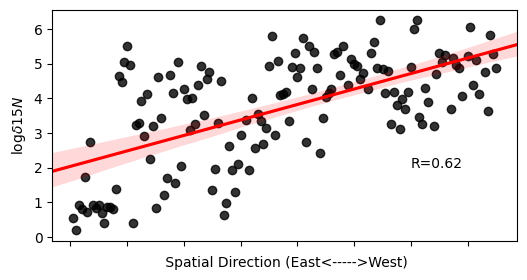

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    1220,
    2,
    "R=" + str(round(r_value, 2)),
    horizontalalignment="left",
    size="medium",
    color="black",
)

handel = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
handel.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"log$\delta15N$")

# Bed 2 not in the manuscript

In [34]:
dfb2 = df[df.bed == 2]  # For Bed 2

Text(0, 0.5, 'Log($\\delta^{15}N$)')

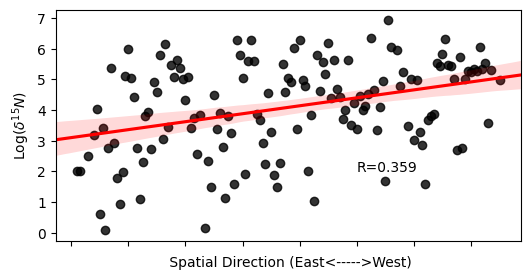

In [35]:
dfb1 = dfb2
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    2200,
    2,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
g1 = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
g1.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"Log($\delta^{15}N$)")

# Facility Position Correction

In [36]:
from RadiMaxML import SpatialCorrection

DF_18_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_18.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [37]:
DF_18_Raw_spatial_corrected_L

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N,bed,x
0,-0.002103,-0.083881,-0.054136,-0.019627,-0.006275,0.015014,0.041632,0.037858,-0.003119,-0.000938,...,0.023398,0.038480,0.040274,0.015057,0.043522,-11.064499,0.984011,-1.520368,1,1101
1,-0.046826,0.017577,-0.020647,-0.039026,-0.020551,-0.002491,0.016361,0.002183,-0.003006,-0.000910,...,-0.024468,0.016384,0.019686,-0.004597,0.004126,-12.613160,0.702710,-1.885794,1,1102
2,-0.094338,0.001213,0.037348,-0.019833,0.002122,-0.007678,0.001091,-0.003078,-0.002893,-0.000881,...,-0.025329,0.016894,0.023121,-0.004696,0.011312,-12.354046,1.151266,-1.176714,1,1103
3,0.019987,-0.029797,0.000304,-0.041080,-0.021747,-0.008208,-0.005218,0.007644,-0.002779,-0.000853,...,-0.018502,0.003880,0.014040,-0.004796,0.015444,-13.707850,0.185713,-1.326672,1,1104
4,-0.047344,0.084143,0.186111,0.082220,-0.013677,-0.007534,-0.005501,0.013148,-0.002666,-0.000825,...,0.005044,-0.005604,0.005282,0.023081,-0.001718,-11.277226,-0.435768,-0.406529,1,1105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.021605,0.031140,0.010797,-0.007509,0.129482,0.020978,-0.027726,-0.003230,-0.016600,-0.018745,...,0.060746,0.006288,-0.024302,-0.013042,0.000804,7.124155,-1.218281,0.366751,2,2244
280,-0.022769,-0.023996,-0.005587,-0.005660,-0.027883,-0.020480,-0.019867,-0.013071,-0.021569,-0.010121,...,0.037297,0.016927,-0.065664,-0.018736,-0.002829,55.182932,-0.574820,0.565086,2,2245
281,0.031652,-0.021015,0.071298,0.000613,0.006258,0.039585,-0.048451,-0.030494,-0.048571,-0.014941,...,-0.030911,-0.051052,-0.054650,-0.028419,-0.023947,-167.667178,-0.617366,-1.432087,2,2246
282,0.194291,0.057693,0.066923,-0.055186,-0.033936,0.037698,-0.037634,-0.006008,-0.016651,-0.014112,...,-0.014860,-0.106913,-0.047216,-0.011360,-0.019729,-1.204809,-0.293244,0.301115,2,2247


In [38]:
DF_18_Raw_spatial_corrected_L.to_csv("DF_18_Raw_spatial_corrected_L.csv")

In [39]:
DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

In [40]:
DF_18_Raw_spatial_corrected_L.iloc[:, 0:-2]

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(150, 160]","RL_July_SD_(160, 170]","RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N
0,-0.002103,-0.083881,-0.054136,-0.019627,-0.006275,0.015014,0.041632,0.037858,-0.003119,-0.000938,...,-0.070415,-0.003205,0.023398,0.038480,0.040274,0.015057,0.043522,-11.064499,0.984011,-1.520368
1,-0.046826,0.017577,-0.020647,-0.039026,-0.020551,-0.002491,0.016361,0.002183,-0.003006,-0.000910,...,-0.064567,-0.059630,-0.024468,0.016384,0.019686,-0.004597,0.004126,-12.613160,0.702710,-1.885794
2,-0.094338,0.001213,0.037348,-0.019833,0.002122,-0.007678,0.001091,-0.003078,-0.002893,-0.000881,...,-0.062345,-0.023830,-0.025329,0.016894,0.023121,-0.004696,0.011312,-12.354046,1.151266,-1.176714
3,0.019987,-0.029797,0.000304,-0.041080,-0.021747,-0.008208,-0.005218,0.007644,-0.002779,-0.000853,...,-0.046861,-0.053928,-0.018502,0.003880,0.014040,-0.004796,0.015444,-13.707850,0.185713,-1.326672
4,-0.047344,0.084143,0.186111,0.082220,-0.013677,-0.007534,-0.005501,0.013148,-0.002666,-0.000825,...,0.124153,0.020647,0.005044,-0.005604,0.005282,0.023081,-0.001718,-11.277226,-0.435768,-0.406529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.021605,0.031140,0.010797,-0.007509,0.129482,0.020978,-0.027726,-0.003230,-0.016600,-0.018745,...,-0.070346,0.111846,0.060746,0.006288,-0.024302,-0.013042,0.000804,7.124155,-1.218281,0.366751
280,-0.022769,-0.023996,-0.005587,-0.005660,-0.027883,-0.020480,-0.019867,-0.013071,-0.021569,-0.010121,...,0.010276,0.013516,0.037297,0.016927,-0.065664,-0.018736,-0.002829,55.182932,-0.574820,0.565086
281,0.031652,-0.021015,0.071298,0.000613,0.006258,0.039585,-0.048451,-0.030494,-0.048571,-0.014941,...,0.061566,0.022060,-0.030911,-0.051052,-0.054650,-0.028419,-0.023947,-167.667178,-0.617366,-1.432087
282,0.194291,0.057693,0.066923,-0.055186,-0.033936,0.037698,-0.037634,-0.006008,-0.016651,-0.014112,...,-0.008094,0.087181,-0.014860,-0.106913,-0.047216,-0.011360,-0.019729,-1.204809,-0.293244,0.301115


In [42]:
#If you dont want warnings 
import warnings
warnings.filterwarnings("ignore")

# Modelling on 2018 Dataset
# Random Forest using five fold cross-validation

In [ ]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)



RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200, 300, 500, 1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r, Fim_raw, pval, ML_df_TestRMSE= ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

In [61]:
Fim_raw.to_csv('FeatureImp2018.csv')

In [38]:
col = DF_18_Raw_spatial_corrected_L.iloc[:, 0:-5].columns
col

Index(['RL_May_SD_(119, 129]', 'RL_May_SD_(129, 140]', 'RL_May_SD_(140, 150]',
       'RL_May_SD_(150, 160]', 'RL_May_SD_(160, 170]', 'RL_May_SD_(170, 180]',
       'RL_May_SD_(180, 190]', 'RL_May_SD_(190, 200]', 'RL_May_SD_(200, 210]',
       'RL_May_SD_(210, 220]', 'RL_June_SD_(119, 129]',
       'RL_June_SD_(129, 140]', 'RL_June_SD_(140, 150]',
       'RL_June_SD_(150, 160]', 'RL_June_SD_(160, 170]',
       'RL_June_SD_(170, 180]', 'RL_June_SD_(180, 190]',
       'RL_June_SD_(190, 200]', 'RL_June_SD_(200, 210]',
       'RL_June_SD_(210, 220]', 'RL_July_SD_(119, 129]',
       'RL_July_SD_(129, 140]', 'RL_July_SD_(140, 150]',
       'RL_July_SD_(150, 160]', 'RL_July_SD_(160, 170]',
       'RL_July_SD_(170, 180]', 'RL_July_SD_(180, 190]',
       'RL_July_SD_(190, 200]', 'RL_July_SD_(200, 210]',
       'RL_July_SD_(210, 220]'],
      dtype='object')

# Fig 6 Feature Importance of Root Distributions for predicting Isotope measurements

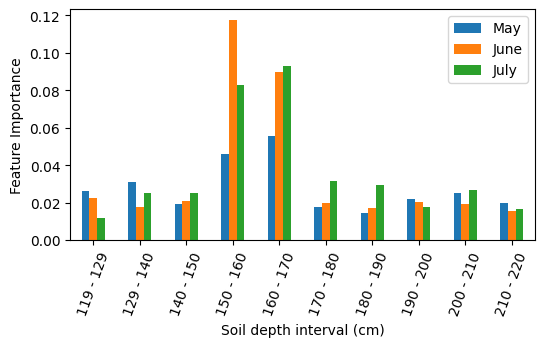

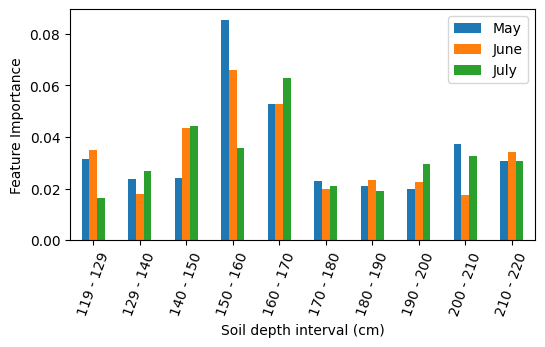

In [66]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    
    Intervals=[str(119)+str(' - ')+str(129), str(129)+str(' - ')+str(140), str(140)+str(' - ')+str(150), str(150)+str(' - ')+str(160), str(160)+str(' - ')+str(170),
                  str(170)+str(' - ')+str(180), str(180)+str(' - ')+str(190), str(190)+str(' - ')+str(200), str(200)+str(' - ')+str(210), str(210)+str(' - ')+str(220)]
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    plt.xlabel('Soil depth interval (cm)')
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

# Gradient Boosting using five fold cross-validation

# Performance metric: Correlation 

In [ ]:
# Gradient Boosting Algorithm

import warnings
warnings.filterwarnings("ignore")

GB_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10,30],  # If None, then max_features=n_features.
    }
]

LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)

# Modelling on 2019 Dataset

In [62]:
from RadiMaxML import SpatialCorrection


DF_19_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_19.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [27]:
DF_19_Raw_spatial_corrected_L

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N,bed,x
0,-0.105407,0.014508,0.072298,-0.089542,0.088982,0.047083,0.009142,0.003155,-0.001394,0.009434,...,0.104006,0.029183,0.022719,-0.007500,-0.000705,-0.056695,0.317102,0.133997,1,1132
1,-0.052435,-0.006519,-0.147426,0.116770,0.046194,-0.030487,0.033866,0.002722,-0.001481,-0.001871,...,0.098153,-0.013907,-0.012331,0.000902,-0.000901,-7.834298,0.835982,-1.350252,1,1133
2,0.087635,-0.031740,0.019170,0.022739,-0.000126,0.063063,-0.007167,0.002289,0.009621,-0.001909,...,-0.018636,0.012541,0.009664,-0.008332,-0.001098,-2.895779,-0.023752,-0.156092,1,1134
3,0.085295,0.090743,0.096175,0.083074,-0.041696,-0.032042,-0.009669,0.001857,0.003311,-0.001946,...,0.052625,-0.023040,-0.019068,-0.008748,-0.001295,-7.313328,-0.108411,-0.976382,1,1135
4,0.035151,0.011645,0.055042,0.042922,-0.023569,-0.032820,0.035102,0.007583,-0.001741,0.004277,...,-0.047961,-0.022551,0.014483,-0.006409,0.004288,-8.401587,0.342764,-1.265185,1,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.009861,0.039730,-0.120441,-0.248936,-0.153646,-0.070182,-0.029546,-0.030806,-0.013238,-0.011030,...,-0.103063,-0.113927,-0.069114,-0.060988,-0.047466,-18.341332,-0.364768,-0.287448,2,2215
207,-0.034318,-0.070018,0.007254,-0.195170,-0.053120,-0.070390,-0.062745,-0.030996,-0.010947,-0.008055,...,-0.117314,-0.138292,-0.091907,-0.047303,-0.040866,-29.328391,0.070289,-0.753097,2,2216
208,0.183645,0.034939,-0.011616,0.072181,0.045831,0.002436,-0.019804,-0.024301,-0.013427,-0.011239,...,0.070957,0.039461,0.064529,0.055434,-0.012903,15.803515,0.019189,0.482394,2,2217
209,-0.012773,-0.067786,-0.001535,-0.068284,-0.108616,-0.068859,-0.063865,-0.031378,-0.010148,-0.011344,...,-0.097494,-0.089846,-0.085632,-0.062269,-0.010213,-24.180334,-0.801281,-0.501783,2,2218


# Random Forest using nested cross-validation

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

# DF_18_Raw_spatial_corrected_L=pd.read_csv('DF_18_Raw_spatial_corrected_L.csv',index_col='Unnamed: 0')

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200, 300, 500, 1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

In [ ]:
# Gradient Boosting Algorithm

import warnings
warnings.filterwarnings("ignore")

GB_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10,30],  # If None, then max_features=n_features.
    }
]

LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
   DF_19_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)

# Performance metric: Correlation 

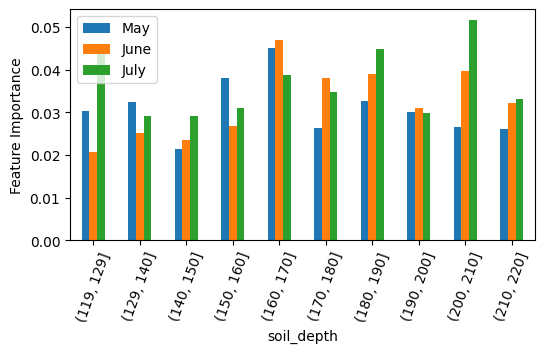

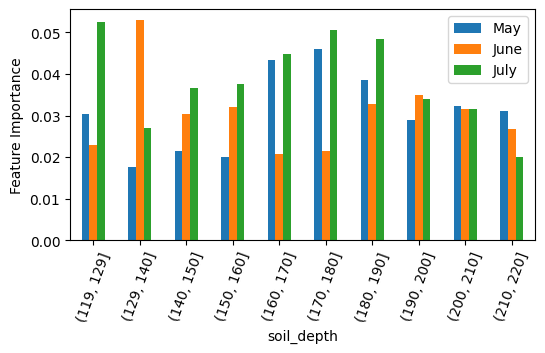

In [72]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

In [ ]:
# Gradient Boosting Algorithm

import warnings
warnings.filterwarnings("ignore")

GB_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10,30],  # If None, then max_features=n_features.
    }
]

LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)


# Gradient Boosting using nested cross-validation

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

# DF_18_Raw_spatial_corrected_L=pd.read_csv('DF_18_Raw_spatial_corrected_L.csv',index_col='Unnamed: 0')

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, 15],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "GB"
)

In [58]:

SI_18_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')

SI_19_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


In [59]:
SI_19_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,ID,Log_Delta_15N
1,63.687305,125.62,136.32,161.14,75.819125,149.22,155.56,184.94,59.709073,159.93,161.76,188.06,1132,1,9.723354,-27.751447,LG_Initial,2.274531
2,65.011491,129.68,133.85,161.02,79.953771,141.43,148.09,177.08,65.742764,154.46,155.76,181.69,1133,1,2.231121,-27.230851,P1083,0.802504
3,74.654774,141.79,138.77,157.31,78.366596,148.01,147.24,171.06,55.883258,152.24,151.68,180.56,1134,1,7.455010,-28.088868,Sj_N0514,2.008886
4,90.266680,118.78,129.51,155.06,94.221109,146.08,147.63,171.55,70.077976,151.31,152.22,177.37,1135,1,3.322832,-28.171810,P0224,1.200818
5,62.703373,130.93,139.74,157.00,69.033986,159.70,155.82,170.14,54.355500,180.56,164.44,172.50,1136,1,2.519944,-27.718919,Sj_M0051,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,97.366450,158.71,150.45,164.39,102.351643,217.98,179.00,197.72,60.477098,194.86,175.20,192.92,2213,2,39.897318,-28.733370,KWS_Lili,3.686309
203,79.614777,131.98,134.30,145.01,84.723097,159.38,152.80,169.70,45.356699,152.53,151.91,170.96,2215,2,29.287565,-28.662173,Drachmann,3.377163
204,79.227962,130.67,136.35,147.37,71.587094,164.50,160.76,173.02,21.447877,105.46,117.90,121.35,2216,2,18.457427,-28.229561,Sheriff,2.915467
205,116.573418,153.73,147.28,169.47,129.099804,195.63,171.59,195.01,86.823692,232.32,189.69,206.42,2217,2,63.746254,-28.283105,P0171,4.154910


In [60]:
SI_18_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,Log_Delta_15N,ID
0,56.875639,110.94,120.39,142.99,22.172378,136.61,141.52,149.92,7.284962,146.98,148.37,150.18,1102,1,1.215484,-24.813728,0.195143,Torp
1,58.597965,113.57,122.61,145.78,21.527085,137.82,142.04,147.97,7.435804,143.32,144.33,144.76,1103,1,2.525698,-24.378695,0.926517,Informer
2,57.237844,110.53,118.78,141.08,28.118945,136.82,142.13,153.62,8.669016,149.50,150.18,150.84,1104,1,2.222993,-25.357771,0.798855,Claire
3,63.464403,130.36,136.18,155.63,39.788720,145.27,148.34,159.17,22.172860,152.47,155.66,163.73,1105,1,5.704717,-25.992775,1.741293,RW41640
4,63.839724,111.84,119.37,144.33,19.507460,135.23,138.42,145.79,6.888762,147.22,148.93,148.34,1106,1,2.058996,-24.026314,0.722218,KWS Montana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,59.970537,114.31,120.26,138.82,37.495155,145.08,150.55,162.61,16.870379,156.23,160.04,157.19,2242,2,198.124113,-26.535656,5.288894,Sj M0567
269,70.490885,115.59,126.03,151.89,40.922208,153.34,158.28,175.23,26.231639,160.75,166.31,177.74,2243,2,429.593530,-25.705704,6.062839,KWS Montana
270,88.036639,128.26,137.28,172.00,53.894609,152.58,161.31,181.68,35.438557,172.59,176.58,184.43,2244,2,208.269947,-28.017986,5.338835,Hereford
271,66.808455,129.05,137.11,164.65,48.310637,159.52,164.21,179.42,30.147397,161.56,166.41,173.45,2246,2,35.373231,-27.424476,3.565955,Sj M0564


In [69]:
SI_18_Raw_spatial_corrected_Done_ML=SI_18_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Delta_15N','Log_Delta_15N','Delta_13C','x']]

In [70]:
SI_19_Raw_spatial_corrected_Done_ML=SI_19_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Delta_15N','Log_Delta_15N','Delta_13C','x']]

# SI correlation of Table 2

In [71]:
np.round(SI_18_Raw_spatial_corrected_Done_ML.corr(),2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
May_half_life,1.00,0.48,0.44,0.79,0.59,0.59,0.27,0.26,-0.17,0.0
June_half_life,0.48,1.00,0.73,0.57,0.76,0.68,0.25,0.32,-0.21,0.0
July_half_life,0.44,0.73,1.00,0.49,0.69,0.70,0.26,0.31,-0.19,0.0
May_Inflection_sig_point,0.79,0.57,0.49,1.00,0.73,0.73,0.36,0.34,-0.27,-0.0
June_Inflection_sig_point,0.59,0.76,0.69,0.73,1.00,0.91,0.31,0.37,-0.30,0.0
July_Inflection_sig_point,0.59,0.68,0.70,0.73,0.91,1.00,0.34,0.39,-0.31,-0.0
Delta_15N,0.27,0.25,0.26,0.36,0.31,0.34,1.00,0.75,-0.17,-0.0
Log_Delta_15N,0.26,0.32,0.31,0.34,0.37,0.39,0.75,1.00,-0.32,-0.0
Delta_13C,-0.17,-0.21,-0.19,-0.27,-0.30,-0.31,-0.17,-0.32,1.00,0.0
x,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.0


In [72]:
import matplotlib.pyplot as plt

In [74]:
from scipy.stats import pearsonr
import numpy as np
rho = SI_18_Raw_spatial_corrected_Done_ML.corr()
pval = SI_18_Raw_spatial_corrected_Done_ML.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
May_half_life,1.0***,0.48***,0.44***,0.79***,0.59***,0.59***,0.27***,0.26***,-0.17**,0.0
June_half_life,0.48***,1.0***,0.73***,0.57***,0.76***,0.68***,0.25***,0.32***,-0.21***,0.0
July_half_life,0.44***,0.73***,1.0***,0.49***,0.69***,0.7***,0.26***,0.31***,-0.19**,0.0
May_Inflection_sig_point,0.79***,0.57***,0.49***,1.0***,0.73***,0.73***,0.36***,0.34***,-0.27***,-0.0
June_Inflection_sig_point,0.59***,0.76***,0.69***,0.73***,1.0***,0.91***,0.31***,0.37***,-0.3***,0.0
July_Inflection_sig_point,0.59***,0.68***,0.7***,0.73***,0.91***,1.0***,0.34***,0.39***,-0.31***,-0.0
Delta_15N,0.27***,0.25***,0.26***,0.36***,0.31***,0.34***,1.0***,0.75***,-0.17**,-0.0
Log_Delta_15N,0.26***,0.32***,0.31***,0.34***,0.37***,0.39***,0.75***,1.0***,-0.32***,-0.0
Delta_13C,-0.17**,-0.21***,-0.19**,-0.27***,-0.3***,-0.31***,-0.17**,-0.32***,1.0***,0.0
x,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0***


In [40]:
SI_19_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,ID,Log_Delta_15N
1,63.687305,125.62,136.32,161.14,75.819125,149.22,155.56,184.94,59.709073,159.93,161.76,188.06,1132,1,9.723354,-27.751447,LG_Initial,2.274531
2,65.011491,129.68,133.85,161.02,79.953771,141.43,148.09,177.08,65.742764,154.46,155.76,181.69,1133,1,2.231121,-27.230851,P1083,0.802504
3,74.654774,141.79,138.77,157.31,78.366596,148.01,147.24,171.06,55.883258,152.24,151.68,180.56,1134,1,7.455010,-28.088868,Sj_N0514,2.008886
4,90.266680,118.78,129.51,155.06,94.221109,146.08,147.63,171.55,70.077976,151.31,152.22,177.37,1135,1,3.322832,-28.171810,P0224,1.200818
5,62.703373,130.93,139.74,157.00,69.033986,159.70,155.82,170.14,54.355500,180.56,164.44,172.50,1136,1,2.519944,-27.718919,Sj_M0051,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,97.366450,158.71,150.45,164.39,102.351643,217.98,179.00,197.72,60.477098,194.86,175.20,192.92,2213,2,39.897318,-28.733370,KWS_Lili,3.686309
203,79.614777,131.98,134.30,145.01,84.723097,159.38,152.80,169.70,45.356699,152.53,151.91,170.96,2215,2,29.287565,-28.662173,Drachmann,3.377163
204,79.227962,130.67,136.35,147.37,71.587094,164.50,160.76,173.02,21.447877,105.46,117.90,121.35,2216,2,18.457427,-28.229561,Sheriff,2.915467
205,116.573418,153.73,147.28,169.47,129.099804,195.63,171.59,195.01,86.823692,232.32,189.69,206.42,2217,2,63.746254,-28.283105,P0171,4.154910


In [49]:
from scipy.stats import pearsonr
import numpy as np
rho = SI_19_Raw_spatial_corrected_Done_ML.corr()
pval = SI_19_Raw_spatial_corrected_Done_ML.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
May_half_life,1.0***,0.58***,0.5***,0.69***,0.39***,0.42***,0.16*,0.17*,-0.01,0.0
June_half_life,0.58***,1.0***,0.59***,0.41***,0.64***,0.44***,0.18**,0.17*,0.13,0.0
July_half_life,0.5***,0.59***,1.0***,0.38***,0.46***,0.55***,0.19**,0.18**,0.08,0.0
May_Inflection_sig_point,0.69***,0.41***,0.38***,1.0***,0.54***,0.49***,0.17*,0.15*,-0.02,0.0
June_Inflection_sig_point,0.39***,0.64***,0.46***,0.54***,1.0***,0.71***,0.13,0.17*,0.06,0.0
July_Inflection_sig_point,0.42***,0.44***,0.55***,0.49***,0.71***,1.0***,0.21**,0.24***,0.12,-0.0
Delta_15N,0.16*,0.18**,0.19**,0.17*,0.13,0.21**,1.0***,0.85***,0.02,0.0
Log_Delta_15N,0.17*,0.17*,0.18**,0.15*,0.17*,0.24***,0.85***,1.0***,0.01,0.0
Delta_13C,-0.01,0.13,0.08,-0.02,0.06,0.12,0.02,0.01,1.0***,0.0
x,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0***


# 2019

In [54]:

SI_19_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


# Bed 1

<AxesSubplot:xlabel='x', ylabel='June_Inflection_sig_point'>

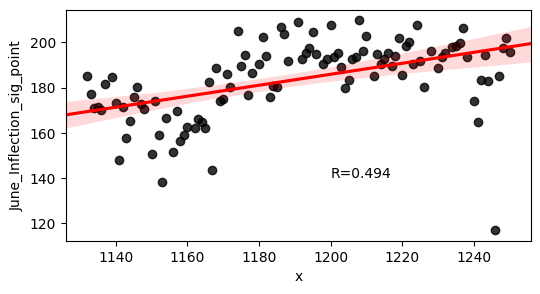

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

SI_18_Raw_spatial_corrected_L=SI_19_Raw_spatial_corrected_L


plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'], SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point']
)
plt.text(
    1200,
    140,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
sns.regplot(
    x=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'],
    y=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point'],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
#handel.set(xticklabels=[])  # remove the tick labels

# Bed 2

<AxesSubplot:xlabel='x', ylabel='June_Inflection_sig_point'>

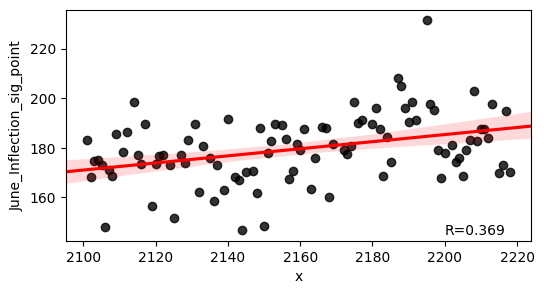

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'], SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['June_Inflection_sig_point']
)
plt.text(
    2200,
    145,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
sns.regplot(
    x=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'],
    y=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['June_Inflection_sig_point'],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
#handel.set(xticklabels=[])  # remove the tick labels

In [56]:
SI_19_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)

In [57]:
from RadiMaxML import SpatialCorrection

SI_19_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_19_Raw_spatial_corrected_L.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [58]:
SI_19_Raw_spatial_corrected_Done_ML=SI_19_Raw_spatial_corrected_Done.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Delta_15N','Log_Delta_15N','Delta_13C','x']]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10, None
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [100,200,500,1000],
        "max_features": [5, 10, None],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    SI_19_Raw_spatial_corrected_Done_ML.copy(), RF_models_param_grid, "RF"
)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10, None
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [100,200,500,1000],
        "max_features": [5, 10, None],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    SI_19_Raw_spatial_corrected_Done_ML.copy(), RF_models_param_grid, "GB"
)

In [75]:
SI_18_Raw_spatial_corrected_Done_ML

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
0,-4.190042,-2.583263,1.102414,0.743876,-2.553148,0.626231,-12.740495,-1.920374,0.718779,1102
1,-1.721430,-1.546611,-2.693216,3.355339,-4.724464,-5.008988,-12.470171,-1.210699,1.167138,1103
2,-4.922818,-2.719960,3.351154,-1.523197,0.704219,0.855793,-13.812765,-1.360061,0.201387,1104
3,14.745794,5.556692,6.185524,12.848266,6.032902,13.530574,-11.370930,-0.439322,-0.420292,1105
4,-3.935594,-4.656657,0.799894,1.369729,-7.568414,-2.074645,-16.056541,-1.480097,1.559494,1106
...,...,...,...,...,...,...,...,...,...,...
268,-15.579784,-17.434722,-15.476720,-21.458880,-18.721906,-22.329765,-0.341924,0.380347,0.233198,2242
269,-14.396812,-9.280489,-11.039236,-8.495487,-6.210655,-1.876862,230.202286,1.142084,1.066458,2243
270,-1.823840,-10.146255,0.718248,11.507906,0.130596,4.716040,7.953497,0.405870,-1.242516,2244
271,-1.227895,-3.417789,-10.476785,3.944692,-2.346901,-6.458154,-166.793633,-1.391429,-0.642389,2246


# Fig. 5 Deep root functioning analysis using root depth estimated by SI

In [2]:
import pandas as pd
import numpy as np
# 2018
DF_Raw=pd.read_csv('RL_Designed_feature_2018.csv',index_col='Unnamed: 0')
DF_SR=pd.read_csv('Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')

In [3]:
DF_SR1=DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','x','bed','Delta_15N','Delta_13C','Log_Delta_15N']]

In [4]:
from RadiMaxML import SpatialCorrection
from RadiMaxML import ML_NCV
DF_SQ_spatial_corrected_L=SpatialCorrection(DF_SR1.copy(),'L')# L for Linear

#PLDF_Raw_Full_test_r,_= ML_NCV(DF_Raw_spatial_corrected_PL.copy())


 Linear correction: Done


In [5]:
DF_SR['Log_Delta_15N']=DF_SQ_spatial_corrected_L['Log_Delta_15N']

In [6]:
DF_SR['Delta_13C']=DF_SQ_spatial_corrected_L['Delta_13C']

In [7]:
#DF_SR=SI_18_Raw_spatial_corrected_Done_ML.copy()

In [8]:
DF_SR

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,Log_Delta_15N,ID
0,56.875639,110.94,120.39,142.99,22.172378,136.61,141.52,149.92,7.284962,146.98,148.37,150.18,1102,1,1.215484,0.718779,-1.920374,Torp
1,58.597965,113.57,122.61,145.78,21.527085,137.82,142.04,147.97,7.435804,143.32,144.33,144.76,1103,1,2.525698,1.167138,-1.210699,Informer
2,57.237844,110.53,118.78,141.08,28.118945,136.82,142.13,153.62,8.669016,149.50,150.18,150.84,1104,1,2.222993,0.201387,-1.360061,Claire
3,63.464403,130.36,136.18,155.63,39.788720,145.27,148.34,159.17,22.172860,152.47,155.66,163.73,1105,1,5.704717,-0.420292,-0.439322,RW41640
4,63.839724,111.84,119.37,144.33,19.507460,135.23,138.42,145.79,6.888762,147.22,148.93,148.34,1106,1,2.058996,1.559494,-1.480097,KWS Montana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,59.970537,114.31,120.26,138.82,37.495155,145.08,150.55,162.61,16.870379,156.23,160.04,157.19,2242,2,198.124113,0.233198,0.380347,Sj M0567
269,70.490885,115.59,126.03,151.89,40.922208,153.34,158.28,175.23,26.231639,160.75,166.31,177.74,2243,2,429.593530,1.066458,1.142084,KWS Montana
270,88.036639,128.26,137.28,172.00,53.894609,152.58,161.31,181.68,35.438557,172.59,176.58,184.43,2244,2,208.269947,-1.242516,0.405870,Hereford
271,66.808455,129.05,137.11,164.65,48.310637,159.52,164.21,179.42,30.147397,161.56,166.41,173.45,2246,2,35.373231,-0.642389,-1.391429,Sj M0564


-0.010824611882805446 1.8535296166612292 -0.2562431055839135 1.817704684227331e-05


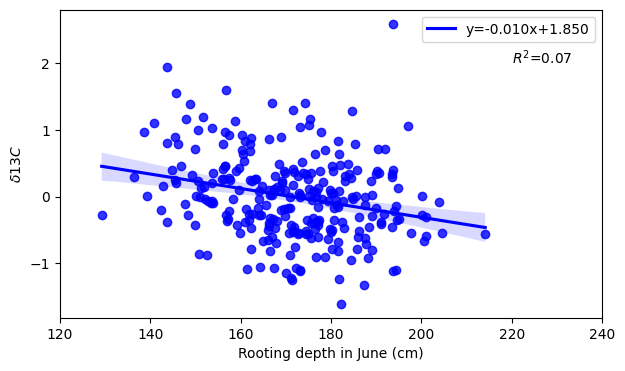

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x+{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')
plt.text(220, 2.0, "$R^2$="+str(round(r_value**2,2)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.xlim((120, 240))
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [ ]:
coeffs, _ = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR).get_lines()[0].get_data()


In [35]:
import seaborn as sns
import statsmodels.api as sm

# Load a sample dataset from Seaborn
#tips = sns.load_dataset("tips")

# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Delta_13C"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Delta_13C   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     19.04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.82e-05
Time:                        10:20:31   Log-Likelihood:                -250.49
No. Observations:                 273   AIC:                             505.0
Df Residuals:                     271   BIC:                             512.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR).get_lines()[0].get_data()


-0.010824611882805446 1.8535296166612292 -0.2562431055839135 1.817704684227331e-05


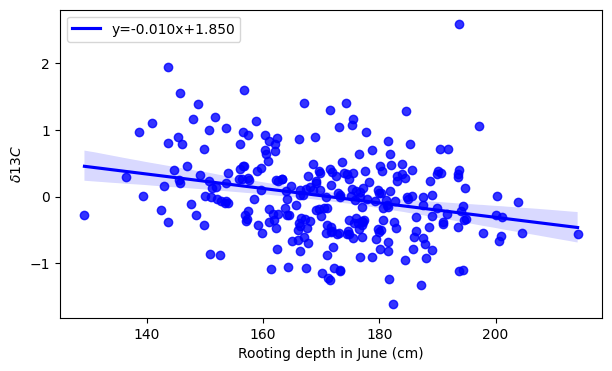

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x+{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')
#plt.text(160, 2, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()


In [13]:
DF_Raw=pd.read_csv('RL_Designed_feature_2019.csv',index_col='Unnamed: 0')
DF_SR=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


In [14]:
DF_SR1=DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','x','bed','Delta_15N','Delta_13C','Log_Delta_15N']]

In [ ]:
from RadiMaxML import SpatialCorrection
from RadiMaxML import ML_NCV
DF_SQ_spatial_corrected_L=SpatialCorrection(DF_SR1.copy(),'L')# L for Linear

#PLDF_Raw_Full_test_r,_= ML_NCV(DF_Raw_spatial_corrected_PL.copy())


 Linear correction: Done


In [ ]:
DF_SR['Log_Delta_15N']=DF_SQ_spatial_corrected_L['Log_Delta_15N']

In [ ]:
DF_SR['Delta_13C']=DF_SQ_spatial_corrected_L['Delta_13C']

0.0073696094232391495 -1.3391291489334876 0.1469475823782677 0.03785585029503501


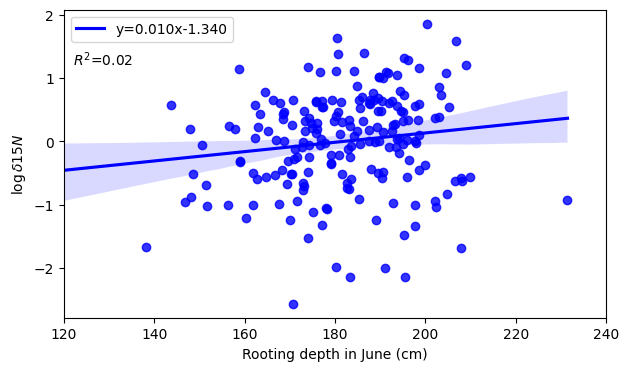

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log  \delta 15N$')
plt.text(122, 1.2, "$R^2$="+str(round(r_value**2,2)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.xlim((120, 240))
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [42]:
import seaborn as sns
import statsmodels.api as sm

# Load a sample dataset from Seaborn
#tips = sns.load_dataset("tips")

# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Delta_13C"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Delta_13C   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.472
Time:                        10:31:14   Log-Likelihood:                -83.523
No. Observations:                 200   AIC:                             171.0
Df Residuals:                     198   BIC:                             177.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

0.0012131695463795597 -0.22044461366328838 0.051157552881233165 0.4718861789094224


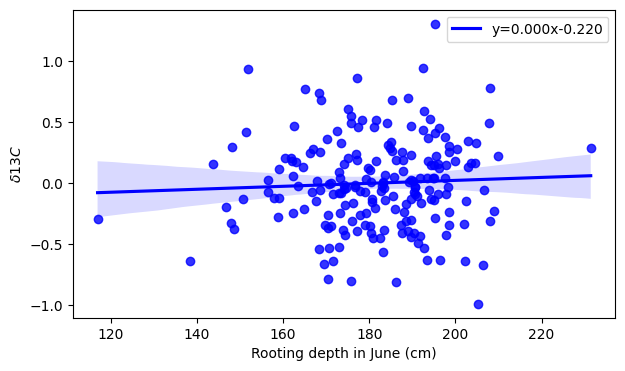

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')
#plt.text(160, 2, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()